# Do Tobacco Sales Correlated to Median Income in the US

In this notebook we want to see if the tobacco sales per capita in the United States are related to the average median income. After analyzing the sales per capita of tobacoo across the entire U.S. We wanted to look at different states and see if the relationship betwteen tobacco sales per capita and average median income differed from that of the entire U.S. We picked the different states
    
    California: we live here and there are a lot of anti-tobacco laws in place
    West Virginia: one of the states with the highest tobacco sales 
    Maryland: one of the states with the highest median income
    
We are curious to see if these states, specifically West Virginia, Kentucky, and Mississippi, follow the same decreasing trend and if it is at a similary rate to the whole country. We decided to focus on states for this portion of our analysis because we the average median income for the entire United States does not hold the same value in each state. By looking at the data specific to each state, we can provide more accurate analysis.

For this analysis we will be omitting the median income for every state from 2015 since the U.S._Chronic_Disease_Indicators__Tobacco.csv, where our data on tobacco sales comes from, does not contain information about the year 2015.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from project_tools.dataformat import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

## Loading and Processing Data

In [16]:
median_income = income_data_import().drop(["2015 Median income", "avg_med_income"], axis = 1)
sales_data = pd.read_csv("data/states_sales.csv")

## California

-0.9106961988762153

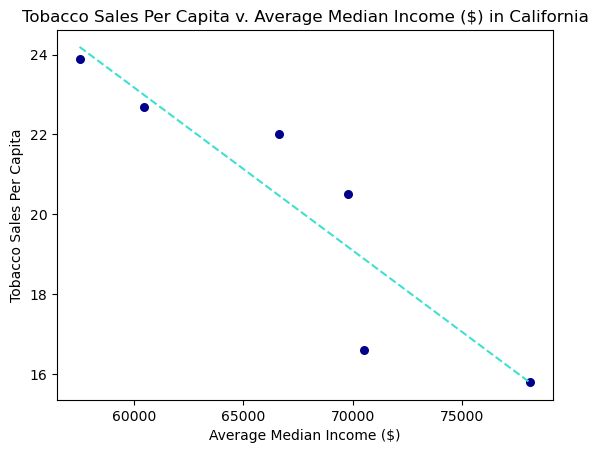

In [17]:
# get the median income for each year for the state, reverse order to the time in sales data
state_med = median_income.loc[median_income.state == "CA"].values[0, 1:7].astype(float)[::-1]
# get the sales data per capita
sales = sales_data.loc[sales_data.LocationAbbr == "CA"].DataValue.values

# perform simple linear regression
slope, intercept, r, p, std_err = stats.linregress(state_med, sales)
    # calulate prediction with regression values
prediction = (slope * state_med) + intercept
plt.scatter(state_med, sales, color = "#00008B", s = 30)
plt.plot(state_med, list(prediction), color = "#40E0D0", linestyle = "dashed")
plt.title("Tobacco Sales Per Capita v. Average Median Income ($) in California")
plt.xlabel("Average Median Income ($)")
plt.ylabel("Tobacco Sales Per Capita")
r

The plot above illustrates that California's tobacco sales per capita follows the national average, it's linearly decreasing. We note that tobacco sales and median income in California have a strong correlation. However this linear relationship could be caused by confounding variables that we are not considering here. Overall our prediction for the sales in California is fairly accurate.

## Missipssippi

-0.6277854313544153

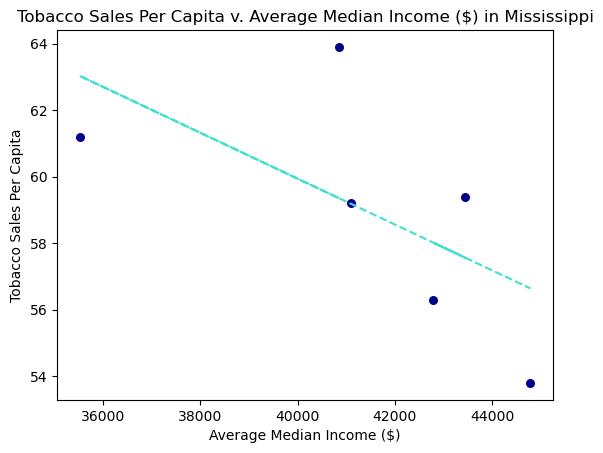

In [22]:
# get the median income for each year for the state, reverse order to the time in sales data
state_med = median_income.loc[median_income.state == "MS"].values[0, 1:7].astype(float)[::-1]
# get the sales data per capita
sales = sales_data.loc[sales_data.LocationAbbr == "MS"].DataValue.values

# perform simple linear regression
sl, intrcpt, r, p, std_err = stats.linregress(state_med, sales)
    # calulate prediction with regression values
pred = (sl * state_med) + intrcpt
plt.scatter(state_med, sales, color = "#00008B", s = 30)
plt.plot(state_med, list(pred), color = "#40E0D0", linestyle = "dashed")
plt.title("Tobacco Sales Per Capita v. Average Median Income ($) in Mississippi")
plt.xlabel("Average Median Income ($)")
plt.ylabel("Tobacco Sales Per Capita")
r

Unlike California, this plot does not appear to be as accurate. The tobacco sales do not appear to be decreasing at a linear rate, so we will look at the regression plot

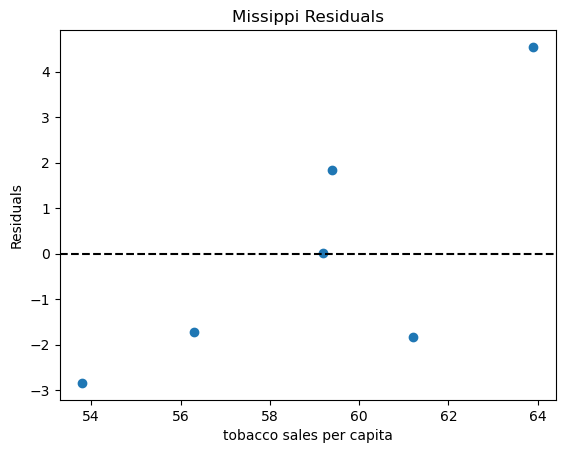

In [14]:
#residual = actual - predicted
resids = sales - pred
plt.scatter(sales, resids)
plt.ylabel("Residuals")
plt.xlabel("tobacco sales per capita")
plt.title("Missippi Residuals")
plt.axhline(0, color = "black", linestyle = "dashed")

Our residuals appear to be

## Maryland

-0.9602763970167781

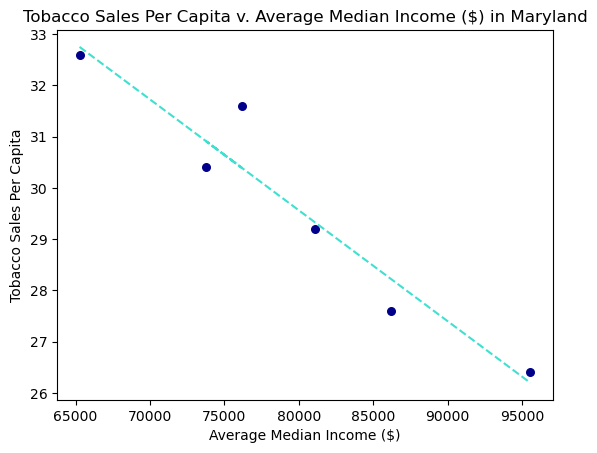

In [23]:
# get the median income for each year for the state, reverse order to the time in sales data
state_med = median_income.loc[median_income.state == "MD"].values[0, 1:7].astype(float)[::-1]
# get the sales data per capita
sales = sales_data.loc[sales_data.LocationAbbr == "MD"].DataValue.values

# perform simple linear regression
slope, intercept, r, p, std_err = stats.linregress(state_med, sales)
    # calulate prediction with regression values
prediction = (slope * state_med) + intercept
plt.scatter(state_med, sales, color = "#00008B", s = 30)
plt.plot(state_med, list(prediction), color = "#40E0D0", linestyle = "dashed")
plt.title("Tobacco Sales Per Capita v. Average Median Income ($) in Maryland")
plt.xlabel("Average Median Income ($)")
plt.ylabel("Tobacco Sales Per Capita")
r

Maryland's tobacco sales per capita appears to be linearly, decreasing when average median income increases. This follows what we saw on a national level. There also appears to be a strong correlation between tobacco sales per capita and average median income (as discussed earlier this could be because of other factors that we have not taken into account)